In [7]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp
import math

def ot_in_cartesian(x_val, y_val, z_val):
    # Define symbolic variables
    x, y, z = sp.symbols('x y z')

    # Express r and theta in terms of x, y, z
    r = sp.sqrt(x**2 + y**2)
    theta = sp.atan2(y, x)

    # Calculate the derivatives of theta with respect to x and y
    dtheta_dx = sp.diff(theta, x)
    dtheta_dy = sp.diff(theta, y)

    # Components of the differential form in cylindrical coordinates
    dx_component = r * sp.sin(r) * dtheta_dx
    dy_component = r * sp.sin(r) * dtheta_dy
    dz_component = sp.cos(r)

    # Substitute specific values and evaluate each component
    dx_component_substituted = dx_component.subs({x: x_val, y: y_val, z: z_val}).evalf()
    dy_component_substituted = dy_component.subs({x: x_val, y: y_val, z: z_val}).evalf()
    dz_component_substituted = dz_component.subs({x: x_val, y: y_val, z: z_val}).evalf()

    return [dx_component_substituted, dy_component_substituted, dz_component_substituted]

# Example usage
print(ot_in_cartesian(1.2, 1.2, 0))  # Example values for x, y, z


def get_basis(matrix, x_val, y_val, z_val):
    # Define symbolic variables x, y, z
    x, y, z = sp.symbols('x y z')

    # Convert the matrix elements to SymPy expressions
    matrix_sympy = [sp.sympify(element) for element in matrix]

    # For a matrix [a, b, c], the kernel is solved by ax + by + cz = 0
    a, b, c = matrix_sympy

    # Constructing the basis vectors
    basis1 = np.array([1, 0, -a/c], dtype=object) if c != 0 else np.array([1, 0, 0], dtype=object)
    basis2 = np.array([0, 1, -b/c], dtype=object) if c != 0 else np.array([0, 1, 0], dtype=object)

    # Function to substitute values into a symbolic expression or return the value if it's not symbolic
    def substitute_if_symbolic(expr, substitutions):
        return expr.subs(substitutions) if isinstance(expr, sp.Expr) else expr

    # Substituting the values of x, y, z
    substitutions = {x: x_val, y: y_val, z: z_val}
    basis1_evaluated = np.array([substitute_if_symbolic(el, substitutions) for el in basis1], dtype=float)
    basis2_evaluated = np.array([substitute_if_symbolic(el, substitutions) for el in basis2], dtype=float)

    return basis1_evaluated, basis2_evaluated


def plot_plane(ax, x, y, z, form, size=0.1, height_limit=0.3, surfcolor='blue', alpha=0.5):
    """
    Plots a small plane at the point (x, y, z) in the directions (1, 0, -x) and (0, 1, 0).
    The rendering of the plane is limited to a small cube around (x, y, z), including vertically.
    """
    v1, v2 = get_basis(form, x, y, z)

    # Create a grid on the plane
    u, v = np.meshgrid(np.linspace(-size, size, 10), np.linspace(-size, size, 10))
    plane_x = x + u * v1[0] + v * v2[0]
    plane_y = y + u * v1[1] + v * v2[1]
    plane_z = z + u * v1[2] + v * v2[2]

    # Clamping the z-values to be within the height_limit
    plane_z = np.clip(plane_z, z - height_limit/2, z + height_limit/2)

    # Plot the plane
    ax.plot_surface(plane_x, plane_y, plane_z, color=surfcolor, alpha=alpha)


[-0.701478066988121, 0.701478066988121, -0.125924751614679]


In [8]:
def knot1(ax, form, n):
    # Define the parametric equations for the knot
      t = np.linspace(0, 2*np.pi, 200)
      x = 3 * np.sin(t) * np.cos(t)
      y = np.cos(t)
      z = np.sin(t)**3

      ax.plot(x, y, z, color='b')

      # Take n equidistant points from t
      t = np.linspace(0, 2 * np.pi, n)
      x = 3 * np.sin(t) * np.cos(t)
      y = np.cos(t)
      z = np.sin(t)**3

      # Call plot_plane for these points
      for xi, yi, zi in zip(x, y, z):
          plot_plane(ax, xi, yi, zi, form, surfcolor='red')


def knot2(ax, form, n):
    # Define the parametric equations for the knot
      t = np.linspace(0, 2*np.pi, 200)
      x = np.cos(t)
      y = np.sin(2*t)
      z = 2/3 * np.sin(t)*np.cos(2*t) -4/3 * np.sin(2*t)*np.cos(t)

      ax.plot(x, y, z, color='b')

      # Take n equidistant points from t
      t = np.linspace(0, 2 * np.pi, n)
      x = np.cos(t)
      y = np.sin(2*t)
      z = 2/3 * np.sin(t)*np.cos(2*t) -4/3 * np.sin(2*t)*np.cos(t)

      # Call plot_plane for these points
      for xi, yi, zi in zip(x, y, z):
          plot_plane(ax, xi, yi, zi, form, surfcolor='red')


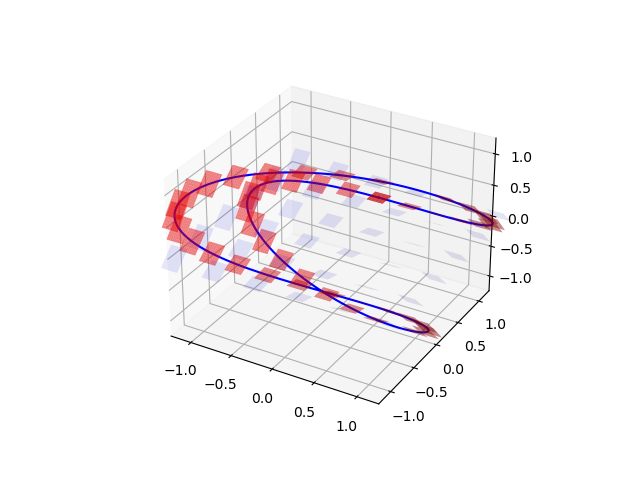

In [9]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

form = [0, 'x', 1]

# Generate a grid in the xy plane
grid_size = 1.2
step = 0.5
for x in np.arange(-grid_size, grid_size + step, step):
    for y in np.arange(-grid_size, grid_size + step, step):
        plot_plane(ax, x, y, 0, form, alpha=0.1)

knot1(ax, form, 50)

# Set plot limits
ax.set_xlim([-grid_size, grid_size])
ax.set_ylim([-grid_size, grid_size])
ax.set_zlim([-grid_size, grid_size])

# Show the plot
plt.show()

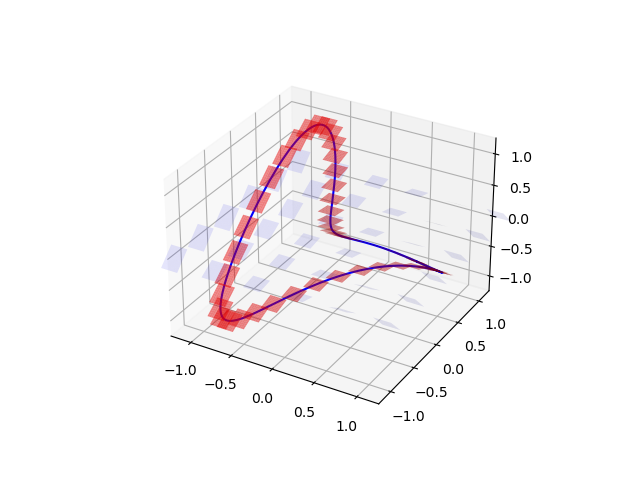

In [10]:

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate a grid in the xy plane
grid_size = 1.2
step = 0.5
for x in np.arange(-grid_size, grid_size + step, step):
    for y in np.arange(-grid_size, grid_size + step, step):
        plot_plane(ax, x, y, 0, form, alpha=0.1)

knot2(ax, form, 50)

# Set plot limits
ax.set_xlim([-grid_size, grid_size])
ax.set_ylim([-grid_size, grid_size])
ax.set_zlim([-grid_size, grid_size])

# Show the plot
plt.show()


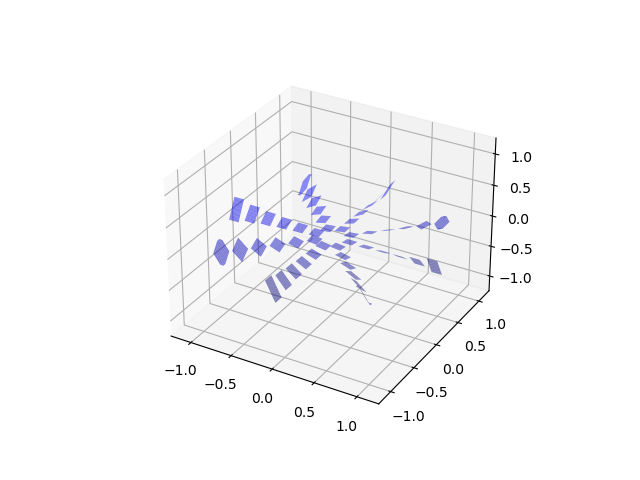

In [11]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Define the polar grid parameters
max_radius = 1.2
radius_step = 0.2
angle_step = math.pi / 4

# Generate the polar grid and convert to Cartesian coordinates
for r in np.arange(0.2, max_radius + radius_step, radius_step):
    for theta in np.arange(0, 2 * math.pi, angle_step):
        x = r * math.cos(theta)
        y = r * math.sin(theta)
        
        # Call the function with Cartesian coordinates
        ot_values = ot_in_cartesian(x, y, 0)

        # Plotting - Assuming 'ax' is predefined and 'plot_plane' is a function you have defined
        plot_plane(ax, x, y, 0, ot_values, alpha=0.5, size=0.06)


# Set plot limits
ax.set_xlim([-grid_size, grid_size])
ax.set_ylim([-grid_size, grid_size])
ax.set_zlim([-grid_size, grid_size])

# Show the plot
plt.show()

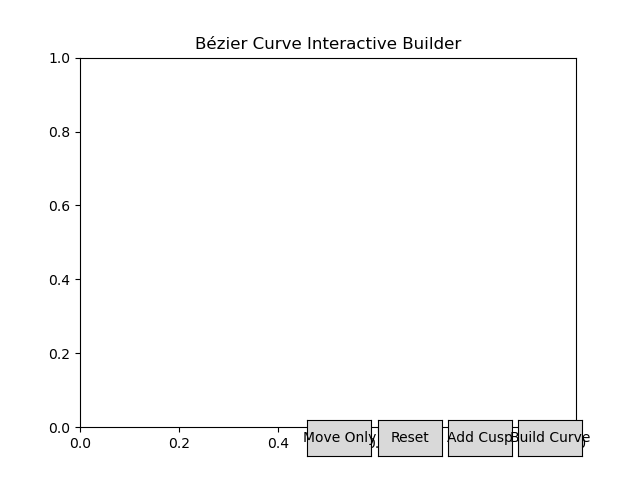

In [14]:
from scipy.special import binom
from matplotlib.lines import Line2D
class BezierBuilder(object):
    """Bézier curve interactive builder with control point limitation and movement."""
    def __init__(self, control_polygon, max_points=4):
        """Constructor. Receives the initial control polygon of the curve."""
        self.control_polygon = control_polygon
        self.xp = list(control_polygon.get_xdata())
        self.yp = list(control_polygon.get_ydata())
        self.canvas = control_polygon.figure.canvas
        self.max_points = max_points
        self.selected_point = None

        # Event handlers
        self.cid_click = self.canvas.mpl_connect('button_press_event', self.on_click)
        self.cid_release = self.canvas.mpl_connect('button_release_event', self.on_release)
        self.cid_move = self.canvas.mpl_connect('motion_notify_event', self.on_move)

        # Create Bézier curve
        line_bezier = Line2D([], [], c=control_polygon.get_markeredgecolor())
        self.bezier_curve = control_polygon.axes.add_line(line_bezier)

        self.cusp_points = []
        self.adding_cusps = False
        self.curves_end_points = []
        self.move_only_mode = False


    def on_click(self, event):
        if event.inaxes != self.control_polygon.axes: 
            return

        if self.move_only_mode:
            # In move-only mode, handle selection of existing points for moving
            self.selected_point = self.get_selected_point(event)
            return

        # Adjust this method to handle different modes
        if event.inaxes != self.control_polygon.axes: 
            return

        if self.adding_cusps:
            # Add cusp point and return immediately without updating curve
            self.cusp_points.append((event.xdata, event.ydata))
            self.draw_cusps()
            return

        if len(self.xp) < self.max_points:
            # Add point
            self.xp.append(event.xdata)
            self.yp.append(event.ydata)
        else:
            # Select point for moving
            self.selected_point = self.get_selected_point(event)

        self.update_curve()

        if self.adding_cusps:
            self.cusp_points.append((event.xdata, event.ydata))
            self.draw_cusps()

        # Snap to the end point of the existing curve if close
        snapped_point = self.snap_to_end_points(event.xdata, event.ydata)
        if snapped_point:
            self.xp.append(snapped_point[0])
            self.yp.append(snapped_point[1])
        else:
            self.xp.append(event.xdata)
            self.yp.append(event.ydata)

        # Update the curve and store end points if maximum points reached
        self.update_curve()
        if len(self.xp) == self.max_points:
            self.curves_end_points.append((self.xp[-1], self.yp[-1]))

    def on_release(self, event):
        """Handle mouse release event."""
        self.selected_point = None

    def on_move(self, event):
        if self.selected_point is None or event.inaxes != self.control_polygon.axes: 
            return

        # Move point
        self.xp[self.selected_point], self.yp[self.selected_point] = event.xdata, event.ydata

        # Snap to cusp if close enough
        snap_point = self.near_cusp(self.xp[self.selected_point], self.yp[self.selected_point])
        if snap_point:
            self.xp[self.selected_point], self.yp[self.selected_point] = snap_point

        self.update_curve()

    def draw_cusps(self):
        for x, y in self.cusp_points:
            self.control_polygon.axes.plot(x, y, 'ro')  # Red dot for cusp
        self.canvas.draw()

    def get_selected_point(self, event):
        """Get index of the selected control point."""
        for i, (x, y) in enumerate(zip(self.xp, self.yp)):
            if np.hypot(x - event.xdata, y - event.ydata) < 0.05: # Threshold for selection
                return i
        return None

    def update_curve(self):
        """Update the Bézier curve and control polygon."""
        self.control_polygon.set_data(self.xp, self.yp)
        self.bezier_curve.set_data(*self._build_bezier())
        self.canvas.draw()

        # Snap to cusp points if close
        if self.xp and self.cusp_points:
            if self.near_cusp(self.xp[0], self.yp[0]):
                self.xp[0], self.yp[0] = self.near_cusp(self.xp[0], self.yp[0])
            if self.near_cusp(self.xp[-1], self.yp[-1]):
                self.xp[-1], self.yp[-1] = self.near_cusp(self.xp[-1], self.yp[-1])

    def near_cusp(self, x, y):
        # Check if (x, y) is near a cusp point
        for cx, cy in self.cusp_points:
            if np.hypot(cx - x, cy - y) < 0.05:  # Threshold
                return cx, cy
        return None

    def snap_to_end_points(self, x, y):
        # Check if (x, y) is near the end point of any curve
        for ex, ey in self.curves_end_points:
            if np.hypot(ex - x, ey - y) < 0.05:  # Threshold for snapping
                return ex, ey
        return None

    def _build_bezier(self):
        x, y = Bezier(list(zip(self.xp, self.yp))).T
        return x, y
    
    def reset(self):
        """Reset the builder to initial state."""
        self.xp, self.yp = [], []
        self.cusp_points = []
        self.curves_end_points = []  # Reset the curve end points
        self.control_polygon.set_data(self.xp, self.yp)
        self.bezier_curve.set_data([], [])
        self.draw_cusps()
        self.canvas.draw()


def Bezier(points, num=200):
    """Build Bézier curve from points."""
    N = len(points)
    t = np.linspace(0, 1, num=num)
    curve = np.zeros((num, 2))
    for ii in range(N):
        curve += np.outer(Bernstein(N - 1, ii)(t), points[ii])
    return curve

def Bernstein(n, k):
    """Bernstein polynomial."""
    coeff = binom(n, k)
    def _bpoly(x):
        return coeff * x ** k * (1 - x) ** (n - k)
    return _bpoly

# Setting up the plot
fig, ax = plt.subplots()
line = Line2D([], [], ls='--', c='#666666', marker='x', mew=2, mec='#204a87')
ax.add_line(line)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_title("Bézier Curve Interactive Builder")

# Initialize the BezierBuilder
bezier_builder = BezierBuilder(line)

# Add "Add Cusp" and "Build Curve" buttons
ax_button_add_cusp = plt.axes([0.7, 0.05, 0.1, 0.075])
btn_add_cusp = plt.Button(ax_button_add_cusp, 'Add Cusp')

ax_button_build_curve = plt.axes([0.81, 0.05, 0.1, 0.075])
btn_build_curve = plt.Button(ax_button_build_curve, 'Build Curve')

ax_button_reset = plt.axes([0.59, 0.05, 0.1, 0.075])
btn_reset = plt.Button(ax_button_reset, 'Reset')

# Create a button for move-only mode
ax_button_move_only = plt.axes([0.48, 0.05, 0.1, 0.075])
btn_move_only = plt.Button(ax_button_move_only, 'Move Only')


# Define button event handlers
def add_cusp(event):
    bezier_builder.adding_cusps = True

def build_curve(event):
    bezier_builder.adding_cusps = False

def reset(event):
    bezier_builder.reset()

def move_only_mode(event):
    bezier_builder.move_only_mode = not bezier_builder.move_only_mode
    if bezier_builder.move_only_mode:
        btn_move_only.label.set_text('Add/Move')
    else:
        btn_move_only.label.set_text('Move Only')

# Connect the event handlers to the buttons
btn_add_cusp.on_clicked(add_cusp)
btn_build_curve.on_clicked(build_curve)
btn_reset.on_clicked(reset)
btn_move_only.on_clicked(move_only_mode)

# Display the plot
plt.show()
